# Build Gauss Naive Bayes and Gauss Bayes (Non Naive) model on MNIST Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [3]:
Mtrain = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_train.csv')



In [4]:
Mtest = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_test.csv')

In [5]:
## MNIST Train data with labels = target y
## 0-783 columns representing the labels (image of 28x28 pixels) X

In [6]:
Mtrain.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
Xtrain = Mtrain.to_numpy()

In [8]:
Xtrain.shape

(60000, 787)

In [9]:
Xtrain

array([[    0,     0,     5, ...,     0,     0,     0],
       [    1,     1,     0, ...,     0,     0,     0],
       [    2,     2,     4, ...,     0,     0,     0],
       ...,
       [59997, 59997,     5, ...,     0,     0,     0],
       [59998, 59998,     6, ...,     0,     0,     0],
       [59999, 59999,     8, ...,     0,     0,     0]])

In [10]:
# Extract the target column 'label' at position 2 in Xtrain

In [11]:
ytrain = Xtrain[:, 2]

In [12]:
ytrain

array([5, 0, 4, ..., 5, 6, 8])

In [13]:
# Extract all the columns from position 3 in Xtrain

In [14]:
Xtrain = Xtrain[:, 3:]

In [15]:
Xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
Xtrain.shape

(60000, 784)

In [17]:
ytrain[0], Xtrain[0,:]

(5,
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,

In [18]:
# Normalising the column data with values ranging from 0-255 using Min-max scaling method

def Data_Scaler(Xdata):
  Xmin = np.min(Xdata)
  Xmax = np.max(Xdata)
  Xscaled = Xdata.astype('float')

  N, D = Xdata.shape

  for i in range(0, N):
    for j in range(0, D):
      Xscaled[i,j] = float((Xdata[i,j] - Xmin) / (Xmax - Xmin))

  return Xscaled

In [19]:
## MNIST Test data with labels = target y
## 0-783 columns representing the labels (image of 28x28 pixels) X

In [20]:
Mtest.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Xtest = Mtest.to_numpy()

In [22]:
Xtest.shape

(10000, 787)

In [23]:
Xtest

array([[   0,    0,    7, ...,    0,    0,    0],
       [   1,    1,    2, ...,    0,    0,    0],
       [   2,    2,    1, ...,    0,    0,    0],
       ...,
       [9997, 9997,    4, ...,    0,    0,    0],
       [9998, 9998,    5, ...,    0,    0,    0],
       [9999, 9999,    6, ...,    0,    0,    0]])

In [24]:
## Extract the labels column at position 2 into ytest

In [25]:
ytest = Xtest[: , 2]

In [26]:
ytest, ytest.shape

(array([7, 2, 1, ..., 4, 5, 6]), (10000,))

In [27]:
# Extract all the columns from 3 in Xtest

In [28]:
Xtest = Xtest[: , 3:]

In [29]:
Xtest.shape

(10000, 784)

In [30]:
ytest[0], Xtest[0,:]

(7,
 array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,

In [31]:
## Scaling Training data using Min-Max scaling method

In [32]:
Xscaled_train = Data_Scaler(Xtrain)

In [33]:
ytrain[0], Xscaled_train[0,:]

(5,
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [ ]:
# Scale test data using Min-max scaling method

In [34]:
Xscaled_test = Data_Scaler(Xtest)

In [35]:
ytest[0], Xscaled_test[0,:]

(7,
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

## Build ***Gauss Naive Bayes*** on MNIST Train data and predict on MNIST test dataset having digits (0-9) represented as 784 columns (28x28 pixels)

In [36]:
class GaussNB():

  def fit(self, X, y, epsilon = 1e-1):
    self.likelihoods = dict()
    self.priors = dict()

    #list of unique classes  0, 1, 2, 3, 4, 5, 6, 7, 8, 9
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k, :]

      self.likelihoods[k] = {"mean": X_k.mean(axis=0), "cov": X_k.var(axis=0) + epsilon}
      self.priors[k] = len(X_k)/len(X)


  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k, l in self.likelihoods.items():
      #Apply Bayes theorem
      P_hat[:, k] = mvn.logpdf(X, l["mean"], l["cov"]) + np.log(self.priors[k])

    return P_hat.argmax(axis = 1)

In [37]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [38]:
gnb = GaussNB()

In [39]:
gnb.fit(Xscaled_train, ytrain)

In [40]:
# Inference
ytrain_hat1 = gnb.predict(Xscaled_train)

In [41]:
accuracy(ytrain, ytrain_hat1)

0.7651333333333333

Text(0.5, 47.7222222222222, 'Predicted label')

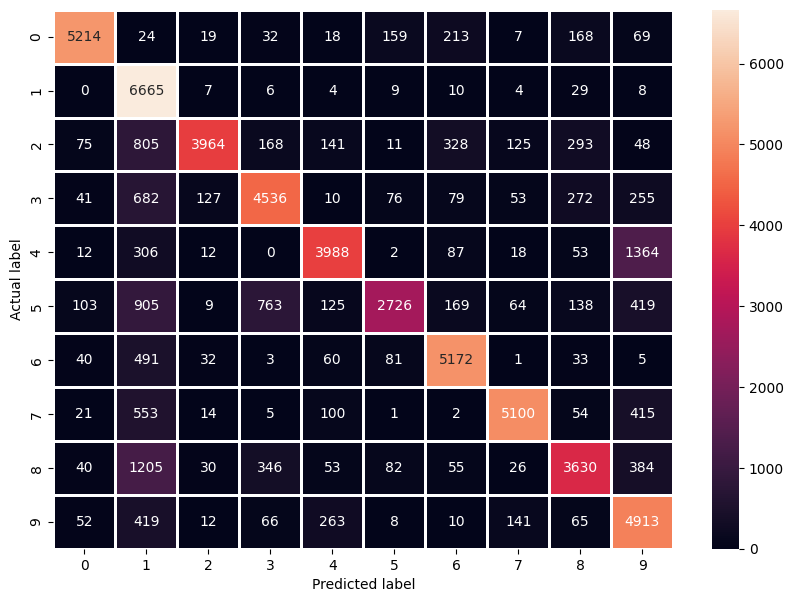

In [42]:
## confusion matrix of scaled train data

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytrain, name='Actual')
y_pred = pd.Series(ytrain_hat1, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Run the  Gauss Naive Bayes model on MNIST ***** SCALED Test ******set with 10000 rows with 10 classes of digits (0-9)
# Get the predictions and accuracy on test data

In [45]:
# Inference from test data
ytest_hat1 = gnb.predict(Xscaled_test)

In [46]:
accuracy(ytest, ytest_hat1)

0.7791

Text(0.5, 47.7222222222222, 'Predicted label')

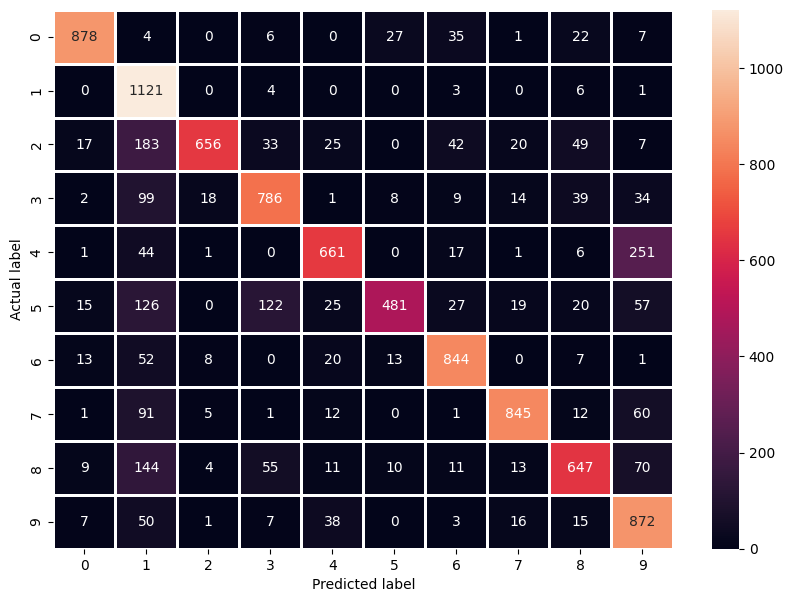

In [47]:
## confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(ytest_hat1, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Build ***Gauss Bayes (Non Naive)*** classifier on MNIST train and test dataset having digits (0-9) i.e. K= 10 classes

In [ ]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-1):
    self.likelihoods = dict()
    self.priors = dict()
    self.K = set(y.astype(int))

    for k in self.K:
      X_k = X[y==k, :]
      N_k, D = X_k.shape
      mu_k = X_k.mean(axis = 0)

      self.likelihoods[k] = {'mean' : X_k.mean(axis = 0),
                             'cov' : (1/(N_k-1)) * np.matmul((X_k-mu_k).T, X_k-mu_k) + epsilon * np.identity(D)}
      self.priors[k] = len(X_k)/len(X)


  def predict(self, X):
    N, D = X.shape
    P_hat = np.zeros((N,len(self.K)))       # initialize results table

    for k, l in self.likelihoods.items():
      P_hat[:, k] = mvn.logpdf(X, l['mean'], l['cov']) + np.log(self.priors[k])

    return P_hat.argmax(axis = 1)


In [ ]:
def accuracy(y, y_hat):
  return np.mean(y==y_hat)

In [ ]:
gauss_b = GaussBayes()

In [ ]:
gauss_b.fit(Xscaled_train,ytrain,epsilon = 1e-1)

In [ ]:
ytrain_hat2 = gauss_b.predict(Xscaled_train)

In [ ]:
accuracy(ytrain, ytrain_hat2)

0.9549333333333333

Text(0.5, 47.7222222222222, 'Predicted label')

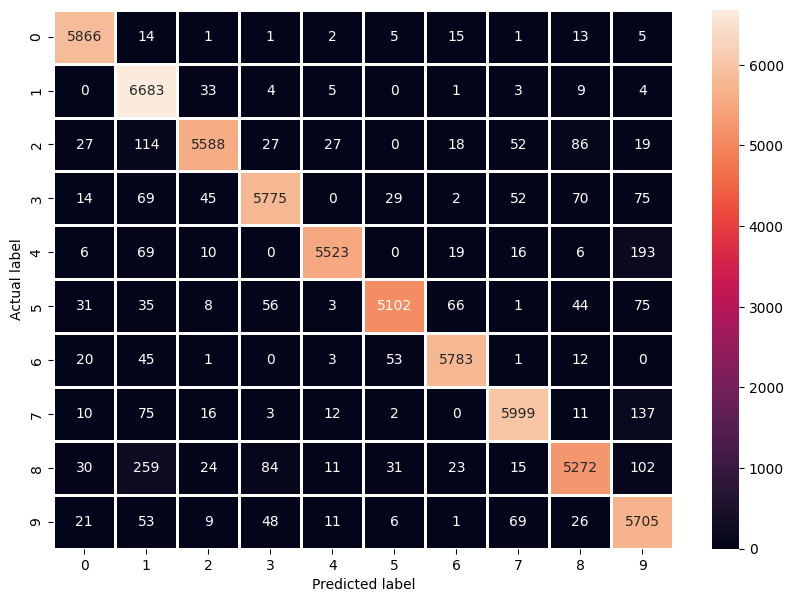

In [ ]:
## confusion matrix of scaled train data

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytrain, name='Actual')
y_pred = pd.Series(ytrain_hat2, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Implement Gauss Bayes (Non Naive) classifier on MNIST ******** SCALED Test *******dataset having 10000 rows with digits (0-9) i.e K = 10 classes
# and predict the results

In [ ]:
ytest_hat2 = gauss_b.predict(Xscaled_test)

In [ ]:
accuracy(ytest, ytest_hat2)

0.9542

Text(0.5, 47.7222222222222, 'Predicted label')

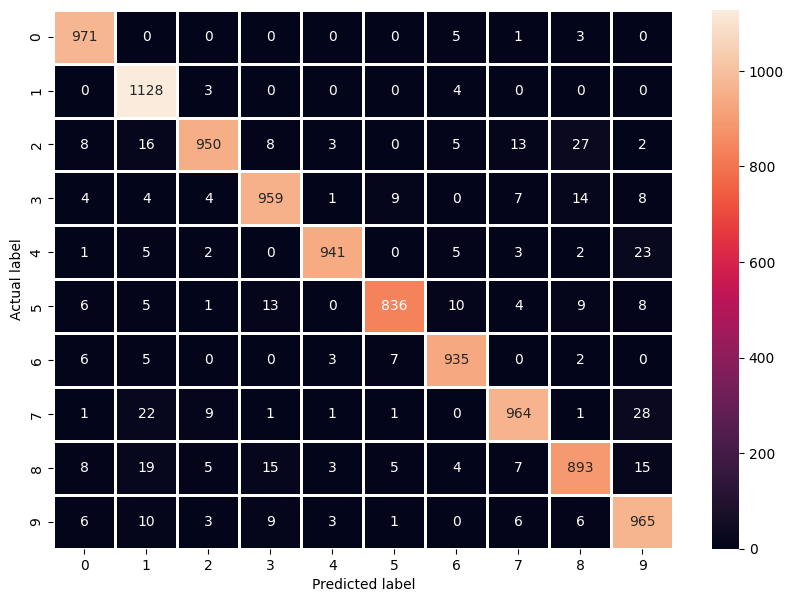

In [ ]:
## confusion matrix of scaled test data

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(ytest_hat2, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Build a KNN Classifier on MNIST train and test dataset having digits (0-9)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
Mtrain = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_train.csv')

In [ ]:
Mtest = pd.read_csv('/content/drive/MyDrive/111 ITC Colab Datasets/MNIST_test.csv')

In [ ]:
## MNIST Train data of 60000 x 787 with labels column = target y
## 0-783 columns representing the label X as an image of 28x28 pixels

Mtrain.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## MNIST Test data of 10000 x 787 with labels column = target y
## 0-783 columns representing the label X as an image of 28x28 pixels
Mtest.head()

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Extract Train data and labels

In [ ]:
Xtrain = Mtrain.to_numpy()

In [ ]:
ytrain = Xtrain[:, 2]

In [ ]:
ytrain

array([5, 0, 4, ..., 5, 6, 8])

In [ ]:
Xtrain = Xtrain[:, 3:]

In [ ]:
Xtrain

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
## Extract Test data and labels

In [ ]:
Xtest = Mtest.to_numpy()

In [ ]:
ytest = Xtest[:, 2]

In [ ]:
ytest

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
Xtest = Xtest[:, 3:]

In [ ]:
Xtest

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

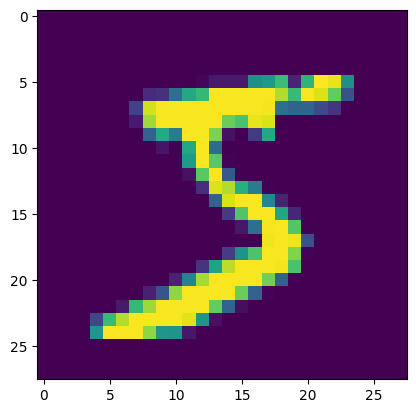

In [ ]:
# MNIST train dataset Image data at index 0
Index0 = Xtrain[0].reshape(28,28)
plt.imshow(Index0)

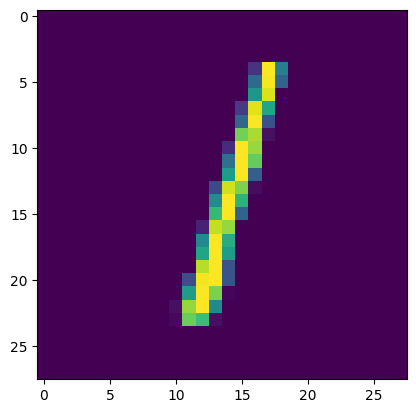

In [ ]:
# MNIST test dataset Image data at index 2
Index2 = Xtest[2].reshape(28,28)
plt.imshow(Index2)

In [ ]:
# Normalising the column data with values ranging from 0-255 using Min-max scaling method

def Data_Scaler(Xdata):
  Xmin = np.min(Xdata)
  Xmax = np.max(Xdata)
  Xscaled = Xdata.astype('float')

  N, D = Xdata.shape

  for i in range(0, N):
    for j in range(0, D):
      Xscaled[i,j] = float((Xdata[i,j] - Xmin) / (Xmax - Xmin))

  return Xscaled

In [ ]:
Xscaled_train = Data_Scaler(Xtrain)

In [ ]:
ytrain[0], Xscaled_train[0,:]

(5,
 array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [ ]:
Xscaled_test = Data_Scaler(Xtest)

In [ ]:
ytest[0], Xscaled_test[0,:].reshape(28,28)

(7,
 array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
       

In [ ]:
# KNN Measures distance between 2 points called euclidean distance

class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, K, epsilon = 1e-3):    # K is number of neighbours
    N = len(X)                                # Total no of observations
    y_hat = np.zeros(N)                       # array of predictions of size N

    #get distances , loop through every point
    for i in range(N):
      dist_square = np.sum((self.X-X[i])**2, axis = 1)

      # Get the indexes of 5 lowest values of distances (idxt is index of nearest point)
      idxt = np.argsort(dist_square)[:K]
      gamma_k = 1 / (np.sqrt(dist_square[idxt] + epsilon))

      ##classes of nearest neighbours, gamma weights (inverse of distances)
      # bincount returns array of  weighted sum for each class
      y_hat[i] = np.bincount(self.y[idxt], weights= gamma_k).argmax()

    return y_hat

In [ ]:
def accuracy(y,y_hat):
  return np.mean(y==y_hat)

In [ ]:
knn = KNNClassifier()

In [ ]:
knn.fit(Xscaled_train,ytrain)

In [ ]:
ytrain_hat = knn.predict(Xscaled_train, 5)          # data, check for 10 neighbours

In [ ]:
accuracy(ytrain, ytrain_hat)

In [ ]:
## confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytrain, name='Actual')
y_pred = pd.Series(ytrain_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
ytest_hat = knn.predict(Xscaled_test, 5)

In [ ]:
accuracy(ytest, ytest_hat)

In [ ]:
## confusion matrix

plt.figure(figsize=(10,7))
y_actu = pd.Series(ytest, name='Actual')
y_pred = pd.Series(ytest_hat, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, linewidths = 2, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')